## Analysis of Regression Methods

Description of random lasso portion of project...

In [46]:
# All required packages should go here. No where else. -jmh
%load_ext autoreload
%autoreload 2

from importlib import reload 
from RegressionTests import *
from RegressionHelpers import *
from RandomLasso import *

import numpy as np
import time
from tqdm import tqdm  # Progress Bar
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Turning off convergence warnings.
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

We know that as the ratio of features to samples increases, the accuracy of any regression algorithm will deteriorate. Let's observe this effect:

In [6]:
# Globals for Testing Lasso and Random Lasso.
tests = 300
start_samples = np.full(tests, 100)
start_features = np.full(tests, 100)
start_informative = np.full(tests, 5)

ratio_feat_to_samp = np.zeros(tests)

rme_least_squares = np.zeros(tests)
rme_ridge = np.zeros(tests)
rme_elastic = np.zeros(tests)
rme_lasso = np.zeros(tests)
rme_adaptive = np.zeros(tests)

f1_least_squares = np.zeros(tests)
f1_ridge = np.zeros(tests)
f1_elastic = np.zeros(tests)
f1_lasso = np.zeros(tests)
f1_adaptive = np.zeros(tests)

runtime_least_squares = np.zeros(tests)
runtime_ridge = np.zeros(tests)
runtime_elastic = np.zeros(tests)
runtime_lasso = np.zeros(tests)
runtime_adaptive = np.zeros(tests)

for ii in tqdm(range(tests)):
    #print("------------ Test", ii + 1, "of", tests, "------------")
    start_samples[ii] = np.round(start_samples[ii])
    start_features[ii] = np.round(start_features[ii] + (ii * 5))
    start_informative[ii] = np.round(start_features[ii] * 0.025)
    ratio_feat_to_samp[ii] = start_features[ii] / start_samples[ii]
    cores = (-1 if start_features[ii] >= 400 else 1)
    
    #print("Samples:", start_samples[ii],
    #      "| Features:", start_features[ii],
    #      "| Informative:", start_informative[ii])
    
    X, y, ground_truth = make_regression(n_samples=start_samples[ii],
                                         n_features=start_features[ii],
                                         n_informative=start_informative[ii],
                                         coef=True)
    
    # Sorting features by their importance. Most important feature in X[:, 0].
    sorted_indices = np.flip(np.argsort(ground_truth))
    ground_truth = ground_truth[sorted_indices]
    X = X[:, sorted_indices]

    # Testing Least Squares
    start_time = time.time()
    reg = linear_model.LinearRegression().fit(X, y)
    rme_least_squares[ii], f1_least_squares[ii], runtime_least_squares[ii] = \
        bulk_analysis_regression(ground_truth, reg.coef_, "LS", start_time)

    # Testing Ridge
    start_time = time.time()
    reg = linear_model.RidgeCV().fit(X, y)
    rme_ridge[ii], f1_ridge[ii], runtime_ridge[ii] = \
        bulk_analysis_regression(ground_truth, reg.coef_, "Ridge", start_time)
    
    # Testing Ridge
    start_time = time.time()
    reg = linear_model.ElasticNetCV().fit(X, y)
    rme_elastic[ii], f1_elastic[ii], runtime_elastic[ii] = \
        bulk_analysis_regression(ground_truth, reg.coef_, "Elastic", start_time)
    
    # Testing Adaptive
    start_time = time.time()
    coef = adaptive_lasso(X, y)
    rme_adaptive[ii], f1_adaptive[ii], runtime_adaptive[ii] = \
        bulk_analysis_regression(ground_truth, coef, "Adaptive", start_time)  

    # Testing Lasso
    start_time = time.time()
    reg = linear_model.LassoCV().fit(X, y)
    rme_lasso[ii], f1_lasso[ii], runtime_lasso[ii] = \
        bulk_analysis_regression(ground_truth, reg.coef_, "Lasso", start_time)
    
# Graph the degrading performance of the RMSE as the ratio of features to samples increases. -jmh

100%|██████████| 300/300 [09:20<00:00,  1.87s/it]


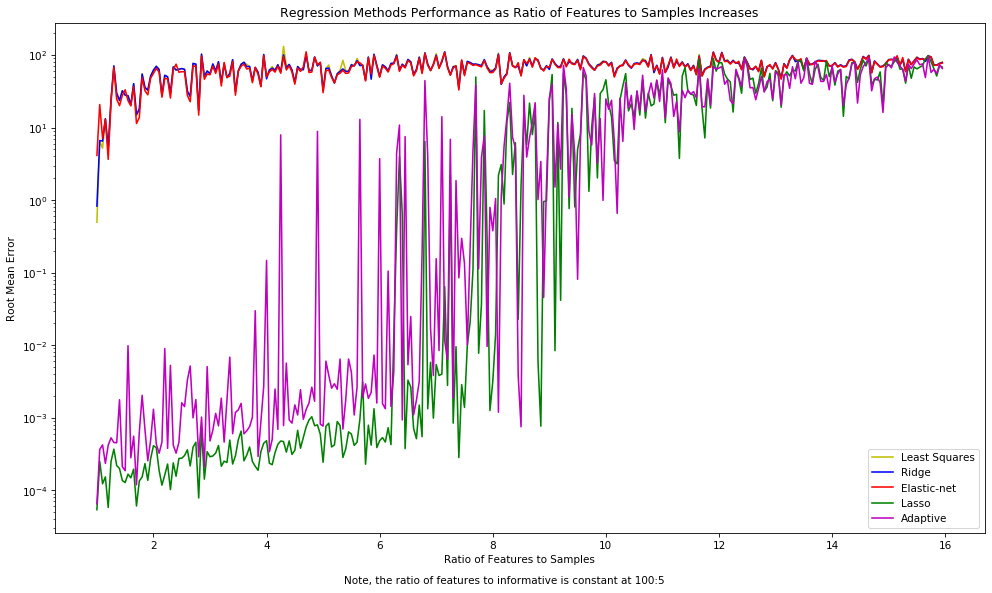

In [50]:
generate_large_plot(
    title="Regression Methods Performance as Ratio of Features to Samples Increases",
    xlabel="Ratio of Features to Samples",
    ylabel="Root Mean Error",
    footnote="Note, the ratio of features to informative is constant at 100:5",
    xdata=ratio_feat_to_samp,
    ydata=np.array([rme_least_squares, rme_ridge, rme_elastic, rme_lasso, rme_adaptive]),
    legend=np.array(["Least Squares", "Ridge", "Elastic-net", "Lasso", "Adaptive"]),
    legend_loc="lower right",
    log=True)

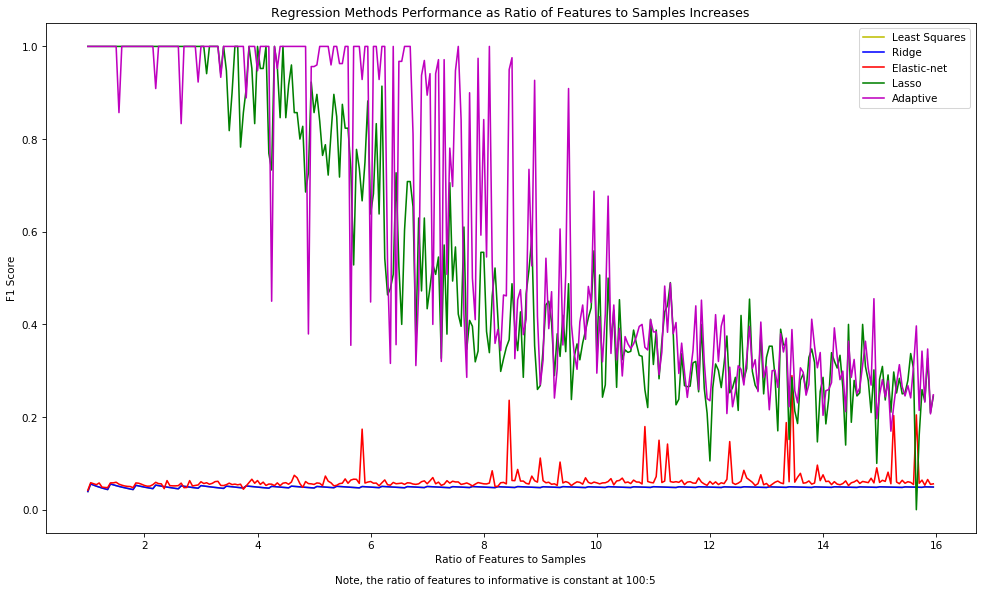

In [51]:
generate_large_plot(
    title="Regression Methods Performance as Ratio of Features to Samples Increases",
    xlabel="Ratio of Features to Samples",
    ylabel="F1 Score",
    footnote="Note, the ratio of features to informative is constant at 100:5",
    xdata=ratio_feat_to_samp,
    ydata=np.array([f1_least_squares, f1_ridge, f1_elastic, f1_lasso, f1_adaptive]),
    legend=np.array(["Least Squares", "Ridge", "Elastic-net", "Lasso", "Adaptive"]),
    legend_loc="upper right",
    log=False)

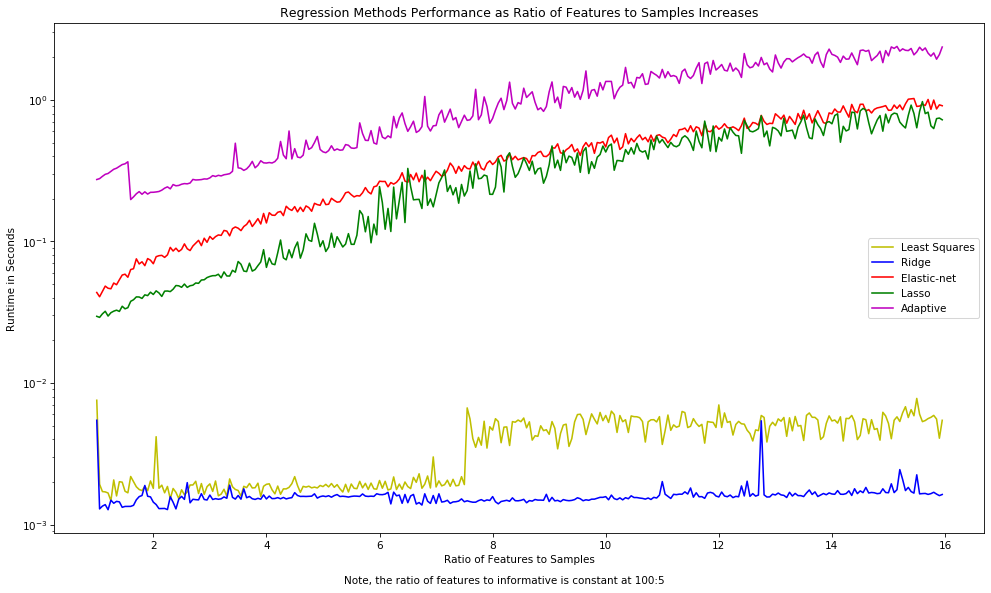

In [53]:
generate_large_plot(
    title="Regression Methods Performance as Ratio of Features to Samples Increases",
    xlabel="Ratio of Features to Samples",
    ylabel="Runtime in Seconds",
    footnote="Note, the ratio of features to informative is constant at 100:5",
    xdata=ratio_feat_to_samp,
    ydata=np.array([runtime_least_squares, runtime_ridge, runtime_elastic, runtime_lasso, runtime_adaptive]),
    legend=np.array(["Least Squares", "Ridge", "Elastic-net", "Lasso", "Adaptive"]),
    legend_loc="center right",
    log=True)

### Effect of y-intercept on Standardized and Non-Standardized Data.

In [ ]:
X, y, ground_truth = make_regression(n_samples=100,
                                     n_features=200,
                                     n_informative=10,
                                     coef=True)

    